### Manifold Learning on Handwritten Digits: Locally Linear Embedding, Isomap, etc.

Here, we illustrate various embedding techniques on the digits datasets, following the following resource: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

Before diving into the code and visualizations, let's look at the descriptions of each technique that we are going to use

><b>Isomap</b>

Isomap is a nonlinear dimensionality reduction method. It is one of several widely used low-dimensional embedding methods. Isomap is used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points. The algorithm provides a simple method for estimating the intrinsic geometry of a data manifold based on a rough estimate of each data point’s neighbors on the manifold. Isomap is highly efficient and generally applicable to a broad range of data sources and dimensionalities. 

Isomap is one representative of isometric mapping methods, and extends metric multidimensional scaling (MDS) by incorporating the geodesic distances imposed by a weighted graph. To be specific, the classical scaling of metric MDS performs low-dimensional embedding based on the pairwise distance between data points, which is generally measured using straight-line Euclidean distance. 

[Ref: https://en.wikipedia.org/wiki/Isomap]

Note: In the mathematical field of graph theory, the distance between two vertices in a graph is the number of edges in a shortest path (also called a graph geodesic) connecting them. This is also known as the geodesic distance or shortest-path distance.

><b>Locally Linear Embedding</b>

Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

Locally Linear Embedding (LLE) sits under the Unsupervised branch of Machine Learning within the group of dimensionality reduction algorithms. In general, LLE is a more efficient algorithm [over IsoMap] as it eliminates the need to estimate pairwise distances between widely separated data points. Furthermore, it assumes that the manifold is linear when viewed locally. Thus it recovers the non-linear structure from locally linear fits.

[Ref: https://towardsdatascience.com/lle-locally-linear-embedding-a-nifty-way-to-reduce-dimensionality-in-python-ab5c38336107]

><b>MDS: Multidimensional Scaling</b>

Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n {\textstyle n} objects or individuals" into a configuration of n {\textstyle n} points mapped into an abstract Cartesian space.

More technically, MDS refers to a set of related ordination techniques used in information visualization, in particular to display the information contained in a distance matrix. It is a form of non-linear dimensionality reduction. 

[Ref: https://en.wikipedia.org/wiki/Multidimensional_scaling]

><b>Spectral Embedding</b>

Spectral Embedding is a technique used for non-linear dimensionality reduction. Under it’s hood, the algorithm in action is Laplacian Eigenmaps. Laplacian Eigenmaps is considerably similar to Isometric Feature Mapping (also referred to as Isomap). You can find an amazing reference to Isomap towards the end of this section, if you are unfamiliar with it. The primary difference between Isomap and Laplacian Eigenmaps is that the goal of Isomap is to directly preserve the global (non-linear) geometry, but the goal of Laplacian Eigenmaps is to preserve the local geometry (i.e., nearby points in the original space remain nearby in the reduced space).

This technique relies on the basic assumption that the data lies in a low-dimensional manifold in a high-dimensional space. Now, this very statement, may lead many readers to stumble, since the term “manifold” here is a entire mathematical concept in itself, that too a hefty and important one.

[Ref: https://medium.com/mlearning-ai/demystifying-spectral-embedding-b2368bba580]

Note: In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point. [Ref: https://en.wikipedia.org/wiki/Manifold]

><b>TSNE</b>

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. The t-SNE algorithm comprises two main stages. 

First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. While the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate. 

In [13]:
import warnings
warnings.filterwarnings("ignore")

<b>Load Digits Dataset:</b> \
We will load the digital dataset and only use six first of the ten available classes:

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

We can plot the first hundered digits from this data set:

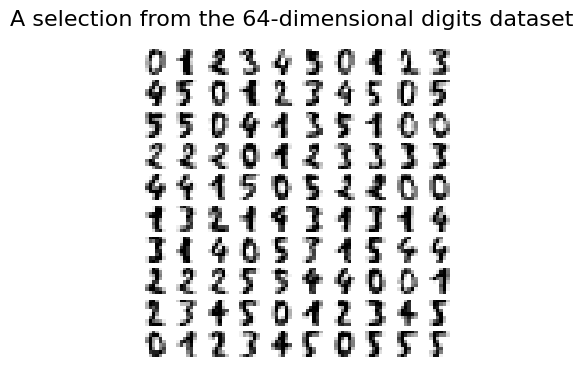

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(4, 4))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

<b>Helper Function to Plot Embedding:</b> \
Below, we will use different techniques to embded the digits dataset. We will plot the projection of the original data onto each embedding. It will allow us to check whether or digits are grouped together in the embedding space, or scattered across it. 

In [8]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler

def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

<b>Embedding Techniques Comparison</b> \
Below, we compare different techniques. However, there a couple of things to note: 
    
1. the RandomTreesEmbedding is not technically a manifold embedding method, as it learn a high-dimensional representation on which we apply a dimensionality reduction method. However, it is often useful to cast a dataset into a representation in which the classes are linearly-separable.
    
2. the LinearDiscriminantAnalysis and the NeighborhoodComponentsAnalysis, are supervised dimensionality reduction method, i.e. they make use of the provided labels, contrary to other methods.
    
3. the TSNE is initialized with the embedding that is generated by PCA in this example. It ensures global stability of the embedding, i.e., the embedding does not depend on random initialization.

In [11]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding

# Manifolds Defined Here: 

from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)

from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(
        n_components=2, n_init=1, max_iter=120, n_jobs=2
        # , normalized_stress="auto"
    ),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

Once we declared all the methodes of interest, we can run and perform the projection of the original data. We will store the projected data as well as the computational time needed to perform each projection.

In [14]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


Plotting the resulting projection given by each method:

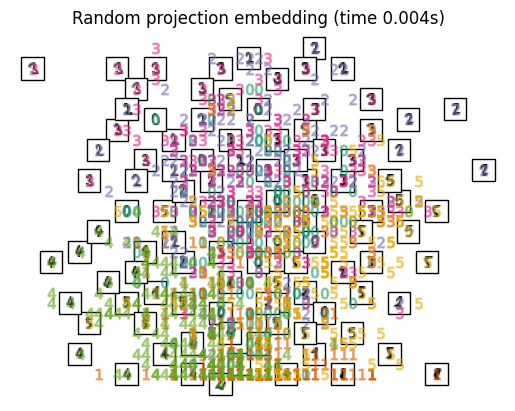

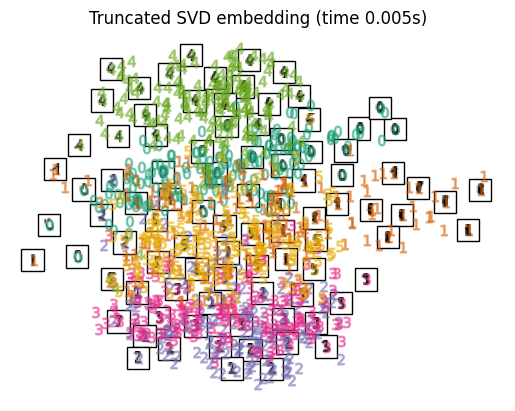

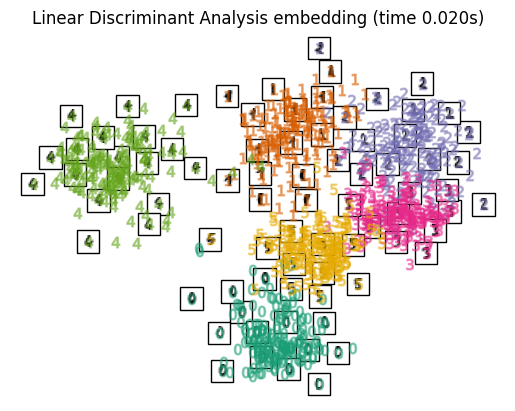

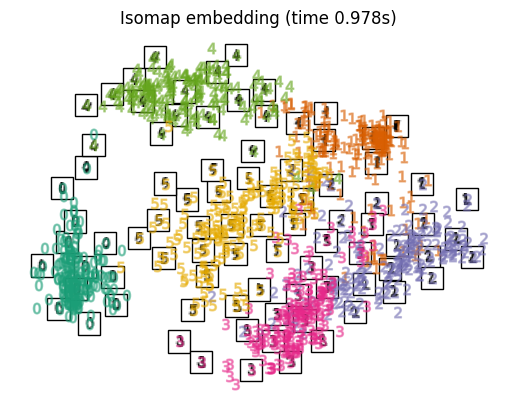

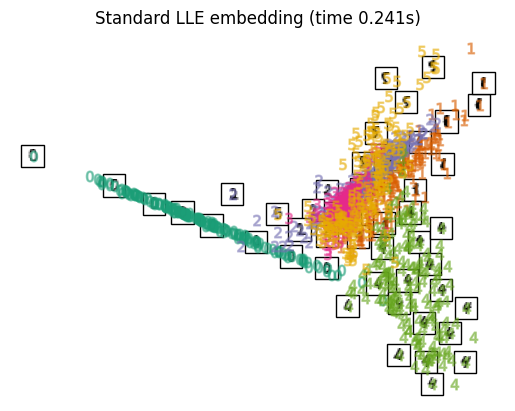

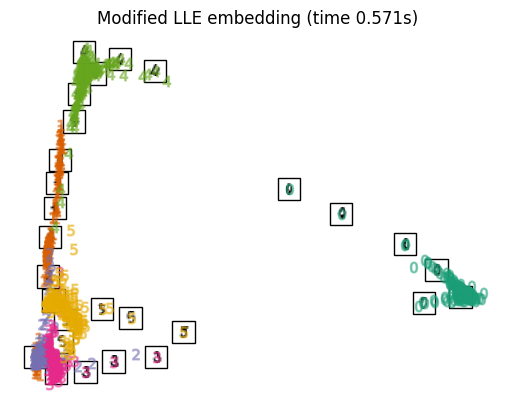

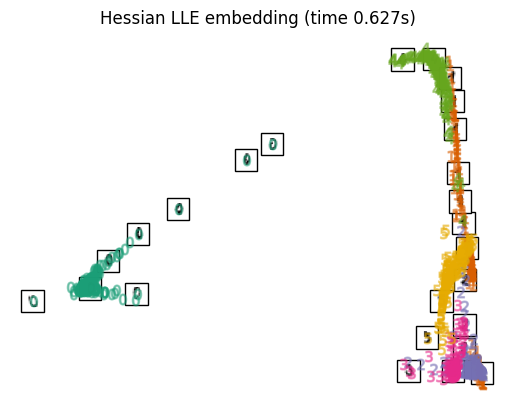

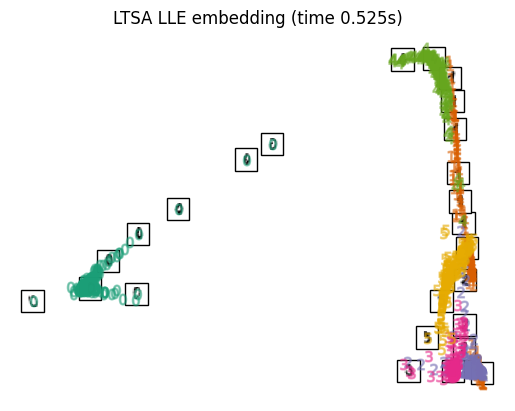

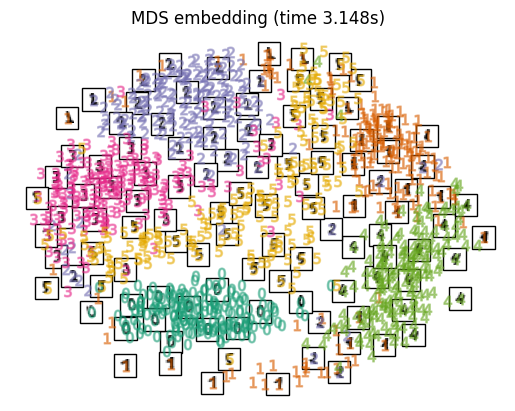

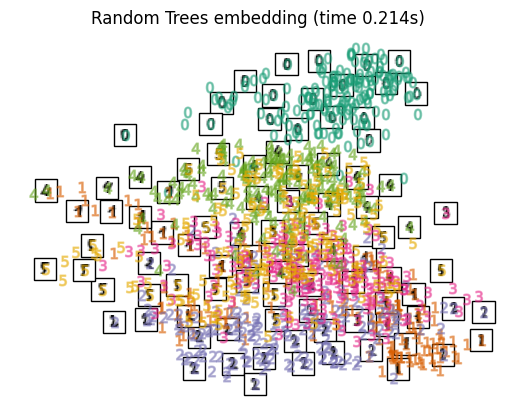

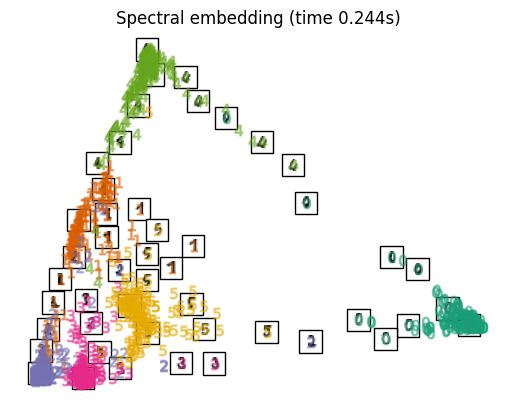

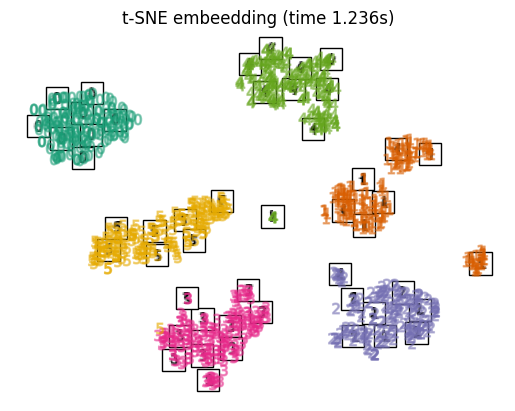

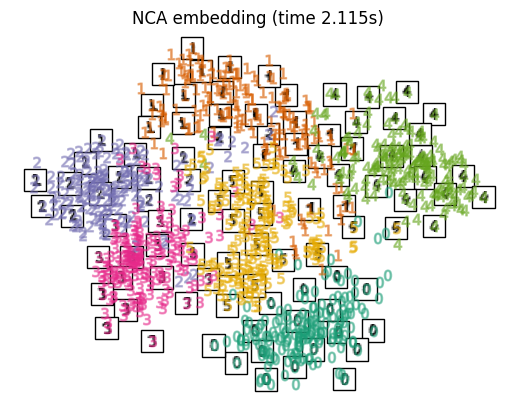

In [16]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

Here we can clearly see the different embedding methods give us different representations that could be useful as per different use cases. 

<i><b>The End.</b></i>